In [1]:
import gym
import __init__
import time
import numpy as np
#0: up
#1: down
#2: left
#3: right
#4: nothing

#enter a number to select agent and move it with wasd

env = gym.make('pressureplate-custom-2p-4')
state = env.reset()
env.render()
agent = 0
dones = [False, False]
stop = False
for i in range(1000):
    if stop:
        break
    action = [4,4]
    _input = input("Enter action as wasd or number to change agent:")

    if _input in ["0","1"]:
        agent = int(_input)
        continue
    elif _input in ["w", "a", "s", "d"]:
        if _input == "w":
            action[agent] = 0
        elif _input == "a":
            action[agent] = 2
        elif _input == "d":
            action[agent] = 3
        else:
            action[agent] = 1
    else:
        continue
    
    if all(dones):
        stop = True
    next_state, reward, dones, _ =  env.step(action)
    env.render()
    printhttps://file+.vscode-resource.vscode-cdn.net/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/envs/registration.py:498(i,"-----------------")
    print(dones)
    print(reward)
    
    print("------------------------")

/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-linear-1p-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-2 already in registry.
  logger.warn(f"Overriding environm

In [1]:
from MADDPGV2.maddpg import MADDPG
from MADDPGV2 import gradient_estimators
from MADDPGV2.buffer import ReplayBuffer
import torch
import numpy as np
import gym
import __init__
import time
from time import sleep, time
import random
from matplotlib import pyplot as plt


env = gym.make('pressureplate-custom-2p-0')
obs_dim = env.observation_space

gradient_estimator = gradient_estimators.GST()

maddpg = MADDPG(
        env=env,
        critic_lr=2e-4,
        actor_lr=2e-4,
        gradient_clip=1.0,
        hidden_dim_width=256,
        gamma=0.96,
        soft_update_size=0.01,
        policy_regulariser=0.001,
        gradient_estimator= gradient_estimator,
        standardise_rewards=True,
        policy_update_freq=2
    )



#maddpg = torch.load("trained_agents/second_cp1_best.pt")


observation_dims = np.array([obs.shape[0] for obs in env.observation_space])


/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-linear-1p-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-2 already in registry.
  logger.warn(f"Overriding envi

In [2]:
import __init__
import gym

max_time_steps = 50_000
episode_counter = 0
max_episode_length_dict = {4:40, 3:60 , 2:70, 1: 80, 0: 100}

eval_freq = 200_000
epsilon = 1
def get_epsilon(epsilon_start = 1, epsilon_end = 0.1, current = 1, decay_period = int(max_time_steps * (9/10))):
    if current <= 0:
        return 0
    delta = (epsilon_start - epsilon_end) / decay_period
    return current - delta

buffer = ReplayBuffer(capacity = max_time_steps, obs_dims = observation_dims, batch_size = 512)

def evaluate(maddpg, max_episode_length = 200):
    eval_env = gym.make('pressureplate-custom-2p-0')
    obs, _ = eval_env.reset()
    eval_reward = np.zeros((2,))
    for i in range(max_episode_length):
        acts = maddpg.acts(obs)
        nobs, rwds, dones, _ = eval_env.step(acts)
        obs = nobs
        eval_reward += np.array(rwds)
        if all(dones):
            break
    maddpg.evaluation_rewards_history.append(eval_reward)
        

modes = np.array([0,1,2,3,4])
mode_dist = np.array([0,0,4,2,2])
mode_dist = mode_dist / mode_dist.sum()
stop_epsiode = True


t1 = time.time()
for t in range(0,max_time_steps):
    if stop_epsiode:
        #iniate the new episode
        mode = np.random.choice(modes, 1, p=mode_dist)[0]
        print(t,"/", max_time_steps,"  episode: ", episode_counter, "  mode:", mode)
        env = gym.make('pressureplate-custom-2p-{}'.format(mode))
        max_episode_length = max_episode_length_dict[mode]
        obs, _  = env.reset()
        dones = [False] * env.n_agents
        episode_steps = 0
        episode_return = np.zeros((env.n_agents,))
        stop_epsiode = False
        episode_counter += 1

    if t % eval_freq == 0:
        evaluate(maddpg=maddpg)
        print("evaluated")
        
        
    epsilon = get_epsilon(current = epsilon)

    explore = random.uniform(0,1)
    if explore < epsilon:
        acts = env.action_space.sample()
    else:
        acts = maddpg.acts(obs)
    
    
    nobs, rwds, dones, _ = env.step(acts)
    episode_steps += 1
    episode_return += np.array(rwds)
    
    if buffer is not None:
                buffer.store(
                    obs=obs,
                    acts=acts,
                    rwds=rwds,
                    nobs=nobs,
                    dones=dones,
                )
    obs = nobs

    sample = buffer.sample()
    if sample is not None:
        maddpg.update(sample)
    
    if all(dones) or (episode_steps >= max_episode_length):
        if all(dones):
            print("Goal is reached!!")
        stop_epsiode = True
t2 = time.time()
maddpg.run_time = t2 - t1

0 / 30000   episode:  0   mode: 4


/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/mert/miniconda3/envs/pressure/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy array 

evaluated
40 / 30000   episode:  1   mode: 3
100 / 30000   episode:  2   mode: 4
140 / 30000   episode:  3   mode: 4
180 / 30000   episode:  4   mode: 3
240 / 30000   episode:  5   mode: 2
310 / 30000   episode:  6   mode: 4
350 / 30000   episode:  7   mode: 4
390 / 30000   episode:  8   mode: 2
460 / 30000   episode:  9   mode: 2
530 / 30000   episode:  10   mode: 2
600 / 30000   episode:  11   mode: 4
640 / 30000   episode:  12   mode: 3


KeyboardInterrupt: 

In [16]:
torch.save(maddpg, "trained_agents/fourth_cp1.pt")

(50, 2)


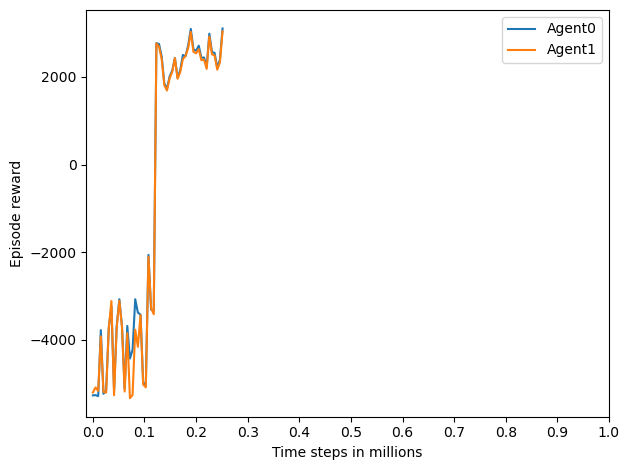

In [3]:
#maddpg = torch.load("experiments/v2obs_policyfreq-3.pt")
N =1
arr = np.array(maddpg.evaluation_rewards_history)


average_reward = arr.sum(axis=1) / 2
agent0_reward = arr[:,0]
agent1_reward = arr[:,1]
smooth_average_reward = np.convolve(average_reward, np.ones((N))/N, mode='valid')
smooth_agent0_reward = np.convolve(agent0_reward, np.ones((N))/N, mode='valid')
smooth_agent1_reward = np.convolve(agent1_reward, np.ones((N))/N, mode='valid')
print(arr.shape)

#plt.plot(smooth_average_reward)
plt.plot(smooth_agent0_reward)
plt.plot(smooth_agent1_reward)
plt.legend(["Agent0", "Agent1"])
plt.xticks(np.arange(0, 200, step=19.5),  labels=[str((0.1)*i)[:3] for i in range(11)])
plt.xlabel("Time steps in millions")
plt.ylabel("Episode reward")
plt.tight_layout()
plt.savefig('smoothing.jpg')

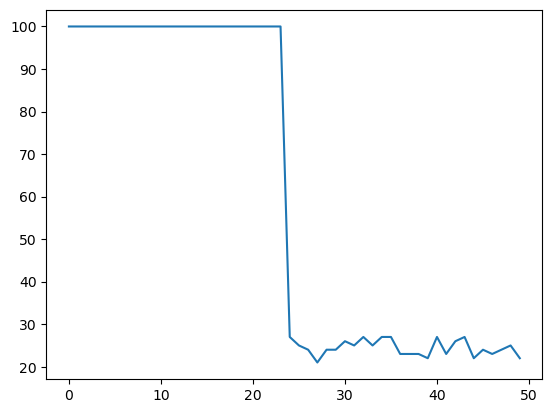

In [2]:
#maddpg = torch.load("experiments/v2obs_policyfreq-2.pt")
arr2 = np.array(maddpg.evaluation_step_history)
plt.plot(arr2)

In [2]:
#Watch policy perform
env = gym.make('pressureplate-custom-2p-2')
obs, _ = env.reset()
dones = [False, False]
import torch


max_episode_length = 100
episode_rewards = np.zeros((2,))
for i in range(max_episode_length):
    #input("continue")
    env.render()
    if all(dones):
        dones = [False, False]
        print("we are doneee")
        break
    
    sleep(0.25)

    acts = maddpg.acts(obs)
    nobs, rwds, dones, _ = env.step(acts)
    print("step reward:", rwds)
    episode_rewards += np.array(rwds)
    obs = nobs
print(episode_rewards)

/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy ar

step reward: [-108.0, -108.25]
step reward: [-108.25, -108.25]
step reward: [-108.0, -108.0]
step reward: [-107.75, -107.75]
step reward: [-107.75, -108.0]
step reward: [-107.5, -107.75]
step reward: [-107.5, -108.0]
step reward: [-107.5, -107.75]
step reward: [-107.75, -107.75]
step reward: [-108.0, -108.0]
step reward: [-108.25, -108.0]
step reward: [-108.5, -107.75]
step reward: [-108.5, -107.5]
step reward: [-108.25, -107.5]
step reward: [-108.0, -105.05]
step reward: [-107.75, -105.3]
step reward: [-107.5, -105.55]
step reward: [-107.25, -105.55]
step reward: [-107.25, -105.3]
step reward: [-107.0, -105.3]
step reward: [-107.25, -105.3]
step reward: [-107.25, -105.55]
step reward: [-107.5, -105.55]


KeyboardInterrupt: 

In [1]:
from MADDPGV2.maddpg import MADDPG
from MADDPGV2 import gradient_estimators
from MADDPGV2.buffer import ReplayBuffer
import torch
import numpy as np
import gym
import __init__
import time
from time import sleep, time
import random
from matplotlib import pyplot as plt


env = gym.make('pressureplate-custom-2p-0')
obs_dim = env.observation_space

gradient_estimator = gradient_estimators.GST()
observation_dims = np.array([obs.shape[0] for obs in env.observation_space])
max_time_steps = 80_000 #check
max_episode_length_dict = {4:40, 3:60 , 2:70, 1: 80, 0: 100}
eval_freq = 500 #check

for policy_update_freq in [1,2,3]: #check

    maddpg = MADDPG(
            env=env,
            critic_lr=2e-4,
            actor_lr=2e-4,
            gradient_clip=1.0,
            hidden_dim_width=256,
            gamma=0.96,
            soft_update_size=0.01,
            policy_regulariser=0.001,
            gradient_estimator= gradient_estimator,
            standardise_rewards=True,
            policy_update_freq=policy_update_freq
        )

    episode_counter = 0
    epsilon = 1
    
    def get_epsilon(epsilon_start = 1, epsilon_end = 0.1, current = 1, decay_period = int(max_time_steps * (9/10))):
        if current <= 0:
            return 0
        delta = (epsilon_start - epsilon_end) / decay_period
        return current - delta

    buffer = ReplayBuffer(capacity = max_time_steps, obs_dims = observation_dims, batch_size = 512)

    def evaluate(maddpg, max_episode_length = 100, gamma = 0.96):
        eval_env = gym.make('pressureplate-custom-2p-2') #check
        obs, _ = eval_env.reset()
        eval_reward = np.zeros((2,))
        episode_step = 0
        for i in range(max_episode_length):
            acts = maddpg.acts(obs)
            nobs, rwds, dones, _ = eval_env.step(acts)
            eval_reward += np.array(rwds) * (gamma**episode_steps)
            episode_step += 1
            obs = nobs
            eval_reward += np.array(rwds)
            if all(dones):
                break
        maddpg.evaluation_rewards_history.append(eval_reward)
        maddpg.evaluation_step_history.append(episode_step)
            

    modes = np.array([0,1,2,3,4])
    mode_dist = np.array([0,0,2.2,1,1]) #check
    mode_dist = mode_dist / mode_dist.sum()
    stop_epsiode = True


    t1 = time()
    for t in range(0,max_time_steps):
        if stop_epsiode:
            #iniate the new episode
            mode = np.random.choice(modes, 1, p=mode_dist)[0]
            print(t,"/", max_time_steps,"  episode: ", episode_counter, "  mode:", mode)
            env = gym.make('pressureplate-custom-2p-{}'.format(mode))
            max_episode_length = max_episode_length_dict[mode]
            obs, _  = env.reset()
            dones = [False] * env.n_agents
            episode_steps = 0
            episode_return = np.zeros((env.n_agents,))
            stop_epsiode = False
            episode_counter += 1

        if t % eval_freq == 0:
            evaluate(maddpg=maddpg)
            
        epsilon = get_epsilon(current = epsilon)

        explore = random.uniform(0,1)
        if explore < epsilon:
            acts = env.action_space.sample()
        else:
            acts = maddpg.acts(obs)
        
        
        nobs, rwds, dones, _ = env.step(acts)
        episode_steps += 1
        episode_return += np.array(rwds)
        
        if buffer is not None:
                    buffer.store(
                        obs=obs,
                        acts=acts,
                        rwds=rwds,
                        nobs=nobs,
                        dones=dones,
                    )
        obs = nobs

        sample = buffer.sample()
        if sample is not None:
            maddpg.update(sample)
        
        if all(dones) or (episode_steps >= max_episode_length):
            if all(dones):
                print("Goal is reached!!")
            stop_epsiode = True
    t2 = time()
    maddpg.run_time = t2 - t1
    torch.save(maddpg, "experiments/v2obs_policyfreq-{}.pt".format(policy_update_freq))
    #torch.save(maddpg, "experiments/reward_plot_experiment.pt".format(policy_update_freq))


/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-linear-1p-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-1 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/envs/registration.py:498: UserWarning: WARN: Overriding environment pressureplate-custom-2p-2 already in registry.
  logger.warn(f"Overriding envi

0 / 10000   episode:  0   mode: 4


/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/home/mert/miniconda3/envs/pressure2/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `reset()` method was expecting numpy ar

40 / 10000   episode:  1   mode: 3
100 / 10000   episode:  2   mode: 3
160 / 10000   episode:  3   mode: 4
200 / 10000   episode:  4   mode: 4
240 / 10000   episode:  5   mode: 3
300 / 10000   episode:  6   mode: 4
340 / 10000   episode:  7   mode: 3
400 / 10000   episode:  8   mode: 3
460 / 10000   episode:  9   mode: 4
500 / 10000   episode:  10   mode: 4
540 / 10000   episode:  11   mode: 4
580 / 10000   episode:  12   mode: 3
640 / 10000   episode:  13   mode: 3
700 / 10000   episode:  14   mode: 3
760 / 10000   episode:  15   mode: 4
800 / 10000   episode:  16   mode: 4
840 / 10000   episode:  17   mode: 3
900 / 10000   episode:  18   mode: 3
960 / 10000   episode:  19   mode: 4
1000 / 10000   episode:  20   mode: 4
1040 / 10000   episode:  21   mode: 4
1080 / 10000   episode:  22   mode: 4
1120 / 10000   episode:  23   mode: 3
1180 / 10000   episode:  24   mode: 4
1220 / 10000   episode:  25   mode: 3
1280 / 10000   episode:  26   mode: 4
1320 / 10000   episode:  27   mode: 4
136